In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

## 실습과제 1 (p.45)
#### 정규분포의 확률 계산

In [2]:
# 평균 12, 표준편차가 3인 정규분포
mu = 12
sigma = 3

# prob1 : 누적확률 15 이하 값 계산
# 정규분포는 평균을 중심으로 종 모양 대칭이므로
# 9 이상 15 이하일 확률은 2*(12 이상 15 이하일 확률) = 2 * (0.5 - prob1)
prob1 = stats.norm.cdf(mu+sigma, mu, sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.3f}".format(mu-sigma, mu+sigma, (prob1-0.5)*2))

# prob2 : 전체 확률 1 - prob1 = 15 이상일 확률
prob2 = 1-prob1
print("{0}km 이상을 달릴 확률은 {1:.3f}".format(mu+sigma, prob2))

9km 이상 15km 이하를 달릴 확률은 0.683
15km 이상을 달릴 확률은 0.159


## 실습과제 2 (p.78)
#### 포아송 분포에서의 확률 계산

In [3]:
# 평균
mu = 3

# prob1 : 1시간에 2명의 손님이 도착할 확률
prob1 = stats.poisson.pmf(2, mu)

# prob2 : 1시간에 1명 이하의 손님이 도착할 확률
prob2 = stats.poisson.cdf(1, mu)

# prob3 : 1시간에 3명 이상의 손님이 도착할 확률
# = 1 - (2명 이하 누적확률)
prob3 = stats.poisson.cdf(2, mu)
prob3 = 1-prob3

print("1시간에 {0}명의 손님이 도착할 확률 : {1:.3f}".format(2, prob1))
print("1시간에 {0}명 이하의 손님이 도착할 확률 : {1:.3f}".format(1, prob2))
print("1시간에 {0}명 이상의 손님이 도착할 확률 : {1:.3f}".format(3, prob3))

1시간에 2명의 손님이 도착할 확률 : 0.224
1시간에 1명 이하의 손님이 도착할 확률 : 0.199
1시간에 3명 이상의 손님이 도착할 확률 : 0.577


## 실습과제 3 (p.96)
#### 정규성 검정

In [4]:
# 패키지 가져오기
from scipy.stats import shapiro

# 데이터셋 불러오기
ds = pd.read_csv("C:/Users/Myung-jin/Documents/210809_dataset/2sample_t_test.csv")
# 결측치 값 제거
ds = ds.dropna()
ds.head()

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


In [5]:
# 변수 Mat_A에 대한 정규성 검정
data1 = ds['Mat_A']
shapiro(data1)

ShapiroResult(statistic=0.9062638878822327, pvalue=0.25630074739456177)

In [6]:
statistic1, p1 = stats.shapiro(data1)
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic1, p1))

Shapiro-Wilk Test : statistic=0.9062638878822327, p-value=0.25630074739456177


In [7]:
"""
1. 가설 수립
- 가설 검정의 목적은 정규성 검정이다.
- H0(귀무가설) : 정규분포를 따른다.
- H1(대립가설) : 정규분포를 따르지 않는다.
- 유의수준 설정 : 0.05

2. 가설 검정 
- 데이터로부터 검정통계량과 p-value 계산한다.
- 검정통계량(statistic) = 0.9062638878822327
- p-value = 0.25630074739456177

3. 검정결과 판단
- 정규성 검정결과(95% 신뢰수준 사용시) p-value > 유의수준(0.05)이므로 귀무가설을 채택한다.
- 변수 Mat_A에 대해 수집된 표본 데이터는 정규분포를 따른다고 볼 수 있다.
"""

'\n1. 가설 수립\n- 가설 검정의 목적은 정규성 검정이다.\n- H0(귀무가설) : 정규분포를 따른다.\n- H1(대립가설) : 정규분포를 따르지 않는다.\n- 유의수준 설정 : 0.05\n\n2. 가설 검정 \n- 데이터로부터 검정통계량과 p-value 계산한다.\n- 검정통계량(statistic) = 0.9062638878822327\n- p-value = 0.25630074739456177\n\n3. 검정결과 판단\n- 정규성 검정결과(95% 신뢰수준 사용시) p-value > 유의수준(0.05)이므로 귀무가설을 채택한다.\n- 변수 Mat_A에 대해 수집된 표본 데이터는 정규분포를 따른다고 볼 수 있다.\n'

In [8]:
# 변수 Mat_B에 대한 정규성 검정
data2 = ds['Mat_B']
shapiro(data2)

ShapiroResult(statistic=0.9729756116867065, pvalue=0.9169799089431763)

In [9]:
statistic2, p2 = stats.shapiro(data2)
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic2, p2))

Shapiro-Wilk Test : statistic=0.9729756116867065, p-value=0.9169799089431763


In [10]:
"""
1. 가설 수립
- 가설 검정의 목적은 정규성 검정이다.
- H0(귀무가설) : 정규분포를 따른다.
- H1(대립가설) : 정규분포를 따르지 않는다.
- 유의수준 설정 : 0.05

2. 가설 검정 
- 데이터로부터 검정통계량과 p-value 계산한다.
- 검정통계량(statistic) = 0.9729756116867065
- p-value = 0.9169799089431763

3. 검정결과 판단
- 정규성 검정결과(95% 신뢰수준 사용시) p-value > 유의수준(0.05)이므로 귀무가설을 채택한다.
- 변수 Mat_B에 대해 수집된 표본 데이터는 정규분포를 따른다고 볼 수 있다.
"""

'\n1. 가설 수립\n- 가설 검정의 목적은 정규성 검정이다.\n- H0(귀무가설) : 정규분포를 따른다.\n- H1(대립가설) : 정규분포를 따르지 않는다.\n- 유의수준 설정 : 0.05\n\n2. 가설 검정 \n- 데이터로부터 검정통계량과 p-value 계산한다.\n- 검정통계량(statistic) = 0.9729756116867065\n- p-value = 0.9169799089431763\n\n3. 검정결과 판단\n- 정규성 검정결과(95% 신뢰수준 사용시) p-value > 유의수준(0.05)이므로 귀무가설을 채택한다.\n- 변수 Mat_B에 대해 수집된 표본 데이터는 정규분포를 따른다고 볼 수 있다.\n'

## 실습과제 4 (p.99)
#### 모표준편차를 아는 경우 모평균 추정

In [15]:
# df 직접 입력
df = pd.DataFrame({'sample':[18, 18, 20, 21, 20, 23, 19, 18, 17, 21,
                            22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})

# 정규분포 구간 추정 함수 실행
lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 3.8/np.sqrt(20))
print("신뢰구간 : ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([17.83], [21.17])


#### 직접 계산 시
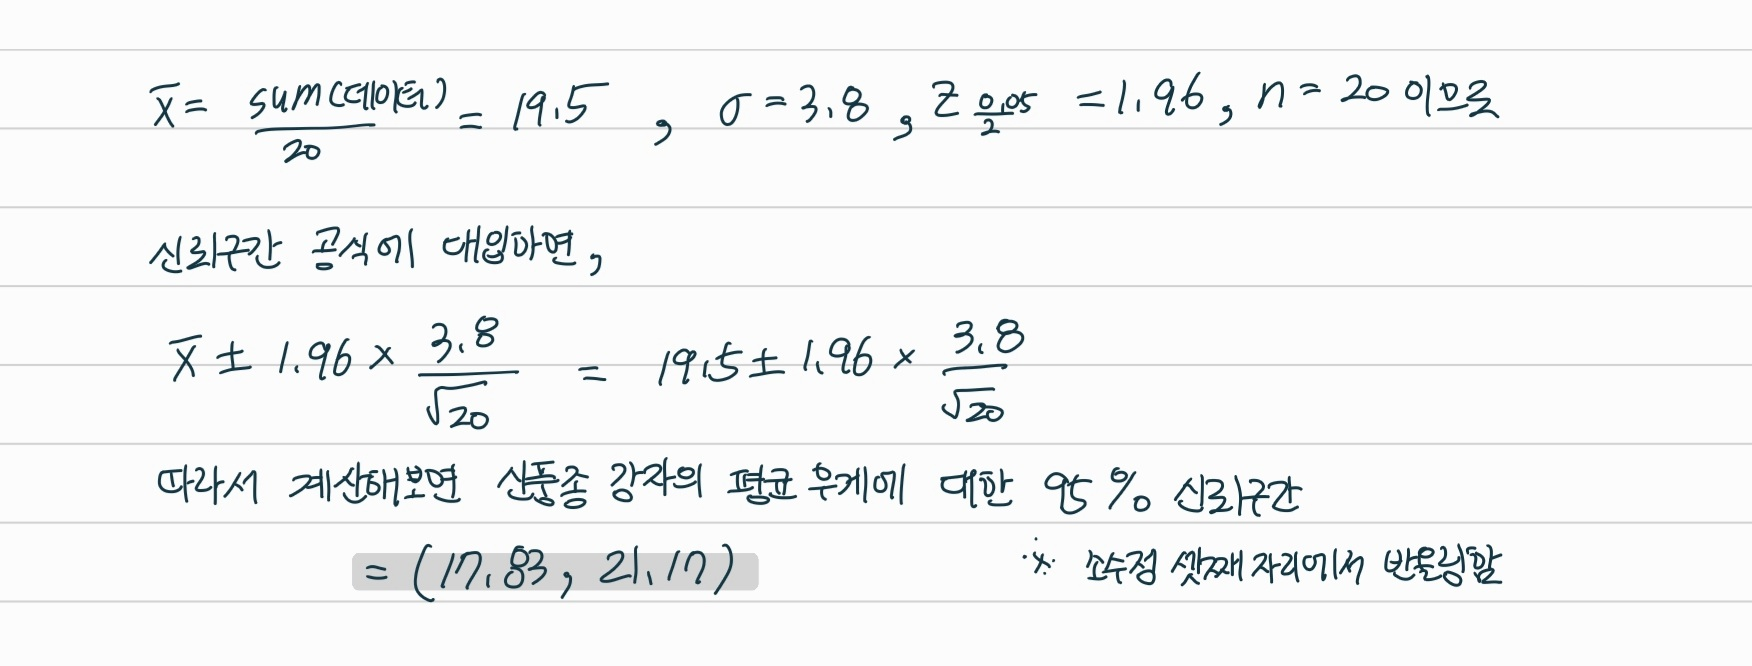

In [16]:
"""신품종 감자의 평균 무게에 대한 95% 신뢰구간이 17.83에서 21.17 사이이다"""

'신품종 감자의 평균 무게에 대한 95% 신뢰구간이 17.83에서 21.17 사이이다'

## 실습과제 5 (p.102)
#### 모표준편차를 모르는 경우 모평균 추정

In [11]:
# df 직접 입력
df = pd.DataFrame({'sample':[73, 71, 74, 69, 70, 73, 70, 68, 75, 72,
                            70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})

# 정규분포 구간 추정 함수 실행
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간 : ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([70.6], [72.4])


#### 직접 계산 시(t분포는 코드 통해 계산)

In [18]:
prop = stats.t.ppf(0.025, 19)
prop

-2.0930240544082634

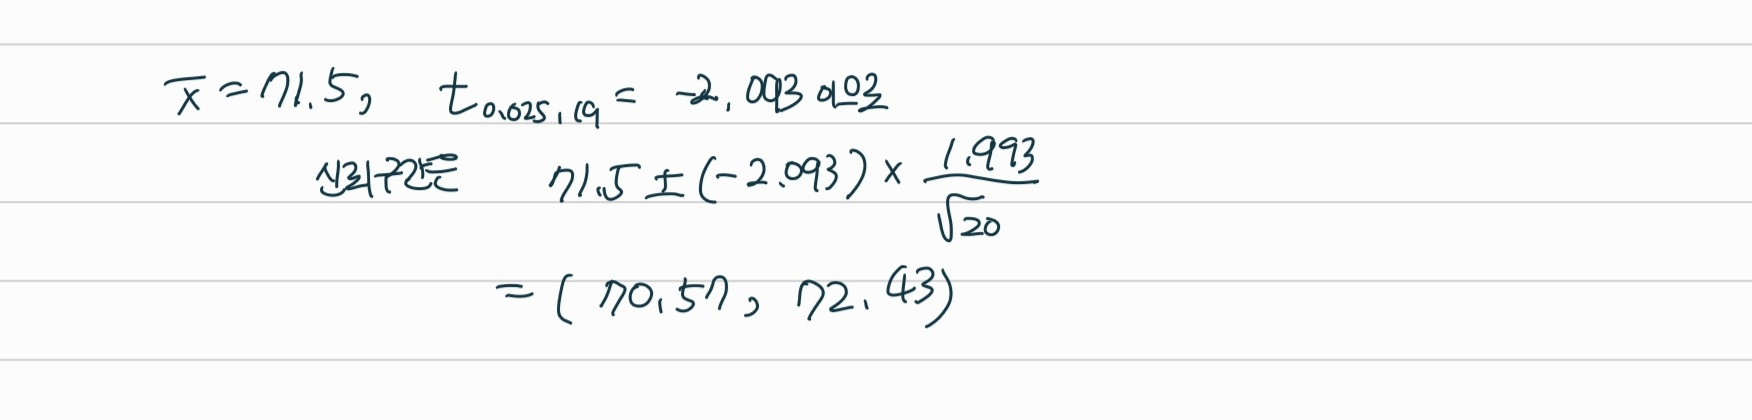

In [19]:
"""
신뢰구간이 70.6에서 72.4 사이인데 70은 신뢰구간에 포함되지 않으므로 
제품개발자는 강종의 평균 인장강도를 70으로 기대할 수 없을 것이다.
"""

'\n신뢰구간이 70.6에서 72.4 사이인데 70은 신뢰구간에 포함되지 않으므로 \n제품개발자는 강종의 평균 인장강도를 70으로 기대할 수 없을 것이다.\n'